In [1]:
import pyemma
import numpy as np

In [2]:
dtrajs = list(np.load('100.npy'))

/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.2, you have 2.5.1.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
len(dtrajs)

5019

In [7]:
bhmm = pyemma.msm.bayesian_hidden_markov_model(dtrajs, 25, 100, connectivity='largest')

/anaconda3/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:540: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)


HBox(children=(HBox(children=(Label(value='Sampling HMSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [9]:
bhmm.nstates

24

In [10]:
bhmm.nstates_obs

100

In [11]:
bhmm.metastable_sets

[array([48, 76]),
 array([47, 97]),
 array([18, 27]),
 array([35, 84]),
 array([67]),
 array([23, 29, 45]),
 array([ 5, 40, 70]),
 array([17, 32, 83]),
 array([21, 96]),
 array([58]),
 array([ 7, 33, 42, 60, 75, 88]),
 array([57, 65, 72]),
 array([41, 44, 66, 74, 85, 93]),
 array([ 1, 12, 43]),
 array([ 4, 69]),
 array([ 6, 15, 59, 86]),
 array([10, 24, 56, 90]),
 array([14, 22, 31, 92, 99]),
 array([ 8, 11, 19, 20, 30, 36, 38, 49, 63, 78, 81]),
 array([ 0,  9, 39, 71, 77, 91]),
 array([28]),
 array([ 3, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98]),
 array([26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94]),
 array([ 2, 34, 46, 52, 53, 64])]

In [12]:
hmm_meta_sets = np.array([np.array([48, 76]), np.array([47, 97]), np.array([18, 27]), np.array([35, 84]),
       np.array([67]), np.array([23, 29, 45]), np.array([65, 72, 83]),
       np.array([ 5, 17, 32, 40, 70]), np.array([21, 96]), np.array([58]),
       np.array([ 4, 69]), np.array([ 1, 43]), np.array([57]),
       np.array([41, 44, 66, 74, 85, 93]), np.array([33, 42, 60, 75, 88]),
       np.array([ 6, 15, 59, 86]),
       np.array([ 8, 11, 19, 30, 36, 38, 49, 63, 78, 81]),
       np.array([10, 12, 24, 56, 90]), np.array([ 0,  9, 39, 71, 77, 91]),
       np.array([14, 22, 31, 92, 99]), np.array([20, 28]),
       np.array([ 3,  7, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98]),
       np.array([26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94]),
       np.array([ 2, 34, 46, 52, 53, 64])])

In [18]:
no_match_bhmm = []

for x in bhmm.metastable_sets:
    matched = False
    for y in hmm_meta_sets:
        if set(x) == set(y):
            matched = True
    if not matched:
        no_match_bhmm.append(x)

In [19]:
no_match_bhmm

[array([ 5, 40, 70]),
 array([17, 32, 83]),
 array([ 7, 33, 42, 60, 75, 88]),
 array([57, 65, 72]),
 array([ 1, 12, 43]),
 array([10, 24, 56, 90]),
 array([ 8, 11, 19, 20, 30, 36, 38, 49, 63, 78, 81]),
 array([28]),
 array([ 3, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98])]

In [20]:
no_match_hmm = []

for x in hmm_meta_sets:
    matched = False
    for y in bhmm.metastable_sets:
        if set(x) == set(y):
            matched = True
    if not matched:
        no_match_hmm.append(x)

In [21]:
no_match_hmm

[array([65, 72, 83]),
 array([ 5, 17, 32, 40, 70]),
 array([ 1, 43]),
 array([57]),
 array([33, 42, 60, 75, 88]),
 array([ 8, 11, 19, 30, 36, 38, 49, 63, 78, 81]),
 array([10, 12, 24, 56, 90]),
 array([20, 28]),
 array([ 3,  7, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98])]

In [22]:
# pull out microstates whose metastable probabilities to examine
5, 40, 70, 17, 32, 83, 65, 72, 57, 7, 12, 20, 28

In [23]:
hmm_meta_memb = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/hmms/results/25/metastable_memberships.npy')

In [26]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [63]:
state = 28

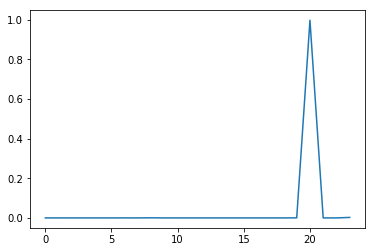

In [64]:
plt.plot(hmm_meta_memb[state])

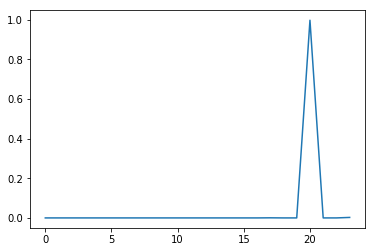

In [65]:
plt.plot(bhmm.metastable_memberships[state])

In [67]:
# let's make alternative metastable sets, where everything over a certain threshold in probability counts
# use observation probabilities

In [68]:
hmm_obs = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/hmms/results/25/observation_probabilities.npy')

In [71]:
hmm_obs.shape

(24, 100)

In [144]:
threshold = 0.09

In [145]:
hmm_new_meta_sets = []

for x in hmm_obs:
    hmm_new_meta_sets.append(np.concatenate(np.argwhere(x>threshold)))

In [146]:
bhmm_new_meta_sets = []

for x in bhmm.observation_probabilities:
    bhmm_new_meta_sets.append(np.concatenate(np.argwhere(x>threshold)))

In [147]:
no_match_bhmm = []

for x in bhmm_new_meta_sets:
    matched = False
    for y in hmm_new_meta_sets:
        if set(x) == set(y):
            matched = True
    if not matched:
        no_match_bhmm.append(x)

In [148]:
no_match_bhmm

[array([ 5, 40, 70]),
 array([17, 83]),
 array([ 7, 42, 60, 75, 88]),
 array([57, 65, 72])]

In [149]:
no_match_hmm = []

for x in hmm_new_meta_sets:
    matched = False
    for y in bhmm_new_meta_sets:
        if set(x) == set(y):
            matched = True
    if not matched:
        no_match_hmm.append(x)

In [150]:
no_match_hmm

[array([65, 72, 83]),
 array([17, 40, 70]),
 array([57]),
 array([42, 60, 75, 88])]

In [168]:
# let's see if metastable sets by mean metastable memberships are any better

In [160]:
mean_meta_membs = bhmm.sample_mean('metastable_memberships')

In [162]:
mean_meta_sets = []

for i in range(24):
    mean_meta_sets.append([])

for i,x in enumerate(mean_meta_membs):
    mean_meta_sets[np.argmax(x)].append(i)

In [163]:
mean_meta_sets

[[20, 48, 76, 78],
 [47, 97],
 [18, 27],
 [35, 84],
 [67],
 [23, 29, 45],
 [5, 40, 70],
 [17, 32, 83],
 [21, 96],
 [58],
 [7, 33, 42, 60, 75, 88],
 [57, 65, 72],
 [41, 44, 66, 74, 85, 93],
 [1, 43],
 [4, 69],
 [6, 15, 59, 86],
 [10, 12, 24, 56, 90],
 [14, 22, 31, 92, 99],
 [8, 11, 19, 30, 36, 38, 49, 63, 81],
 [0, 9, 39, 71, 77, 91],
 [28],
 [3, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98],
 [26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94],
 [2, 34, 46, 52, 53, 64]]

In [166]:
no_match_bhmm = []

for x in mean_meta_sets:
    matched = False
    for y in hmm_meta_sets:
        if set(x) == set(y):
            matched = True
    if not matched:
        no_match_bhmm.append(x)

In [167]:
no_match_bhmm

[[20, 48, 76, 78],
 [5, 40, 70],
 [17, 32, 83],
 [7, 33, 42, 60, 75, 88],
 [57, 65, 72],
 [8, 11, 19, 30, 36, 38, 49, 63, 81],
 [28],
 [3, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98]]

In [169]:
# let's see what the 95% CIs are for the macrostates in the BHMM anyway

In [170]:
pi = bhmm.stationary_distribution

In [171]:
piL,piR = bhmm.sample_conf('stationary_distribution')

In [176]:
for i in range(24): print(100*pi[i], 'L',100*piL[i],'R',100*piR[i])

0.255255175107 L 0.141268171432 R 0.467673462897
0.632986744214 L 0.325335926255 R 1.09344010211
0.185286569817 L 0.110017638009 R 0.572501689461
0.219900536833 L 0.103776970538 R 0.430890919709
1.51239646542 L 0.616473430646 R 4.24147237653
5.78249239397 L 3.40641088021 R 7.5507039635
0.320509789499 L 0.167792780858 R 0.884979114941
1.39429063284 L 0.643445535379 R 3.60212004717
4.4789854757 L 1.67834879283 R 5.40330506711
2.09580509546 L 0.785970123802 R 3.84665903553
2.08904583855 L 1.01445859398 R 3.18018144552
2.26198060091 L 1.41928529167 R 3.31036336186
0.869633665603 L 0.542916223234 R 2.06100395484
2.44245279308 L 1.35061983692 R 5.31789414873
9.46036991828 L 3.06008347579 R 22.2021837961
2.23800786927 L 1.24787374036 R 3.44152358163
3.92817439946 L 1.93069438083 R 8.79128183729
7.61968591437 L 4.0407398983 R 13.375526953
9.34749324964 L 6.81816852131 R 12.629359153
3.95751001062 L 2.3264247244 R 7.94192339377
5.70901125662 L 3.33133747134 R 11.6784144186
3.40011360521 L 2.353

In [177]:
# so I see two options - either we extract populations per microstates with the errors and then re-sum them into
# the ML macrostates (but can't do that for SAM - less microstates there then in ML HMM) or we calculate the HMM
# with sliding counts - i.e. errors will be underestimated - let's confirm that with sliding counts we get the same ML

In [181]:
# do sliding counts (stride=1) on lilac

In [182]:
# now get HMM timescales

In [4]:
its = pyemma.msm.timescales_hmsm(dtrajs, 24, errors='bayes')

HBox(children=(HBox(children=(Label(value='estimating BayesianHMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

/anaconda3/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:540: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)
/anaconda3/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:540: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)
/anaconda3/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:540: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)
/anaconda3/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:540: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEig

05-05-18 00:18:29 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[1] WARNING  Ignored error during estimation: Stationary distribution contains entries smaller than 1e-15 during iteration
05-05-18 00:18:29 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[2] WARNING  Estimation has failed at lagtimes: [710]. Details:
['Error at lag time 710: Stationary distribution contains entries smaller than '
 '1e-15 during iteration']
05-05-18 00:18:29 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[2] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


In [8]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [9]:
sns.set_context('paper')
sns.set(font='Arial')
sns.set_style('ticks')

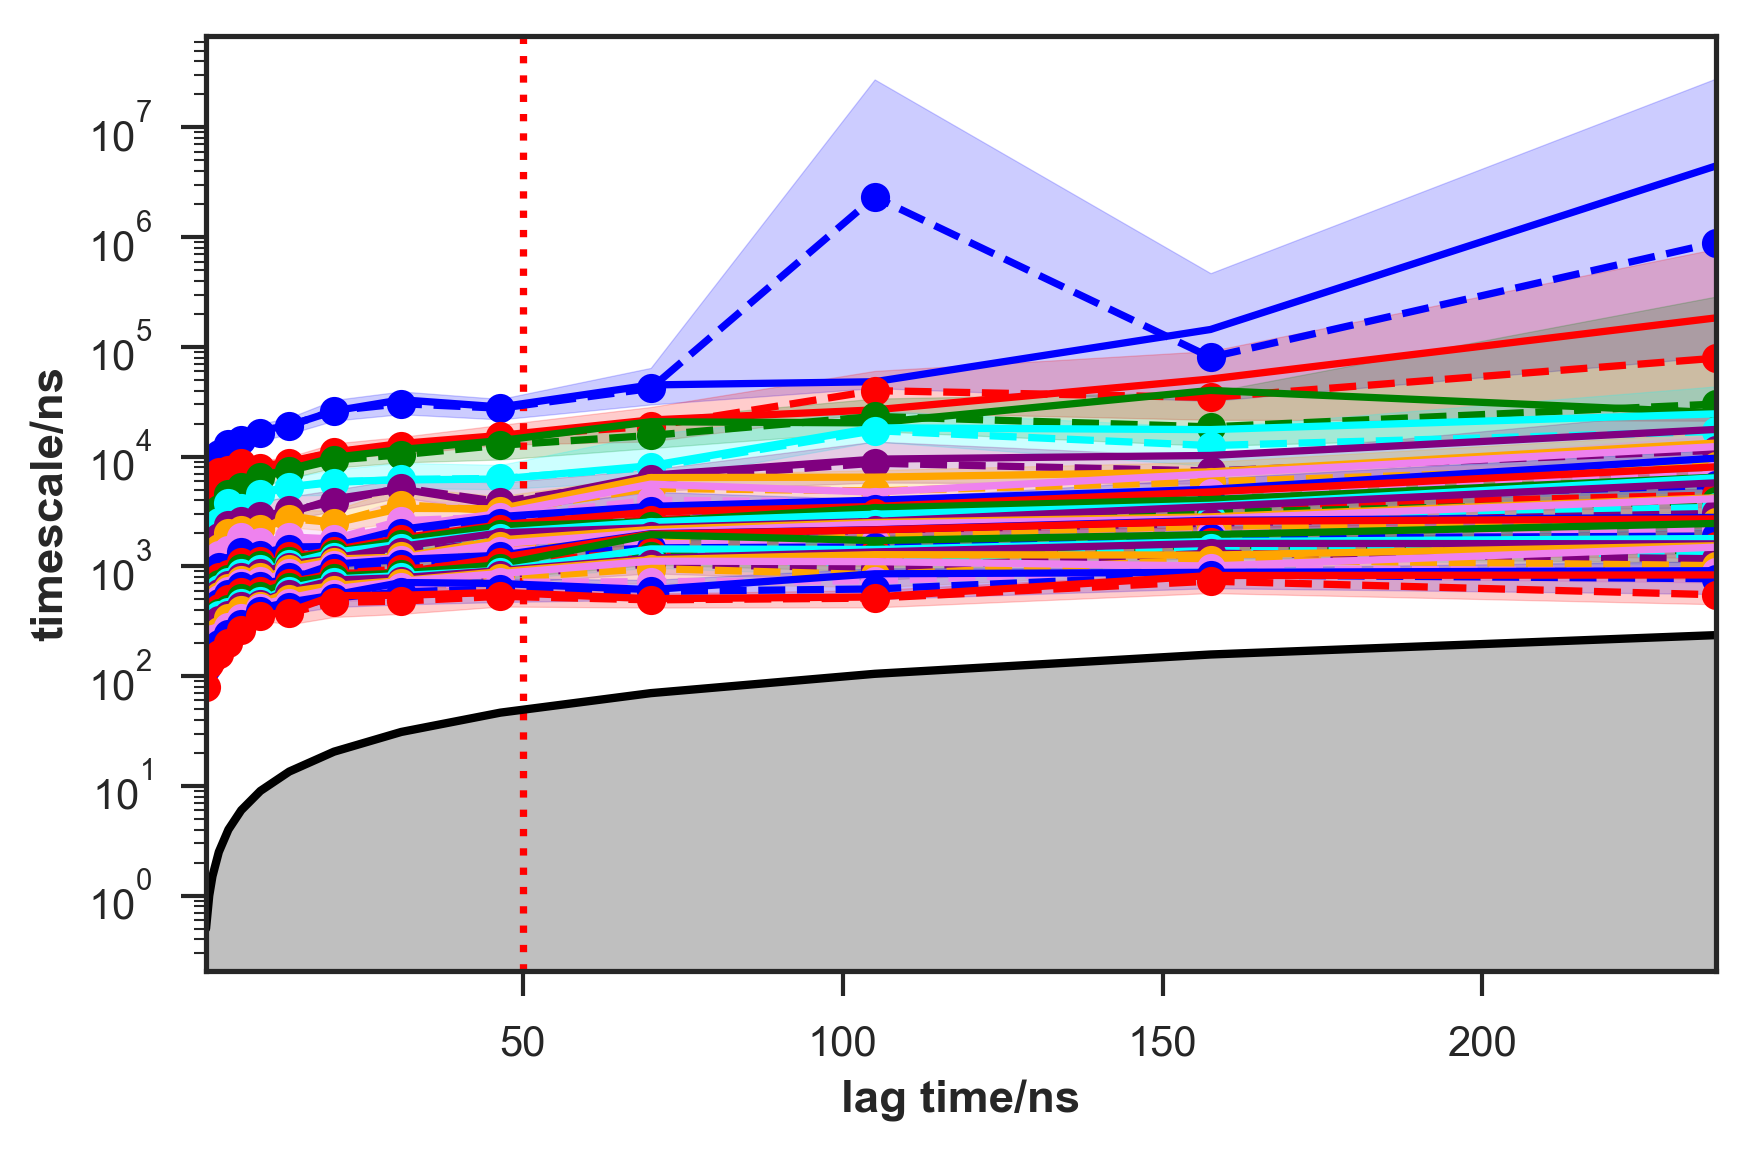

In [11]:
plt.rcParams['axes.labelweight'] = 'bold'
plt.figure(dpi=300)
ax = pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns', show_mle=True, show_mean=True)
plt.xlabel('lag time/ns')
plt.ylabel('timescale/ns')
ylim = ax.get_ylim()
plt.vlines(50, ylim[0], ylim[1], colors="red", linestyles="dotted")
ax.set_ylim(ylim)
plt.tight_layout()
plt.savefig('apo_BHMSM_timescales_mean_mle.pdf')
plt.show()